# K NEAREST NEIGHBOR

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
import numpy as np

### Exoplanet Identification
#### The variables (columns) in this dataset have been scrubbed based on the sensitivity analysis does on each individual ability to predict whether a Kepler Object of Interest or "koi" is a potential exoplanet.

#### There will be some columns dropped from the dataset before training the model
#### koi_disposition is the "label" that identifies each koi as either a FALSE POSITIVE, CONFIRMED, or CANDIDATE


In [2]:
df = pd.read_csv("data/clean_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_model_snr,koi_tce_plnt_num,koi_srad
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,25.8,2,0.927
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,76.3,1,0.868
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,505.6,1,0.791
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,40.9,1,1.046
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,40.2,2,0.972


In [3]:
target = df["koi_disposition"]
target_names = ["confirmed","candidate","false_positive"]

In [4]:
data = df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_model_snr,koi_tce_plnt_num,koi_srad
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,25.8,2,0.927
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,76.3,1,0.868
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,505.6,1,0.791
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,40.9,1,1.046
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,40.2,2,0.972


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    


k: 1, Train/Test Score: 1.000/0.800
k: 3, Train/Test Score: 0.894/0.805
k: 5, Train/Test Score: 0.871/0.819
k: 7, Train/Test Score: 0.861/0.820
k: 9, Train/Test Score: 0.853/0.827
k: 11, Train/Test Score: 0.848/0.826
k: 13, Train/Test Score: 0.844/0.819
k: 15, Train/Test Score: 0.842/0.821
k: 17, Train/Test Score: 0.840/0.808
k: 19, Train/Test Score: 0.835/0.812


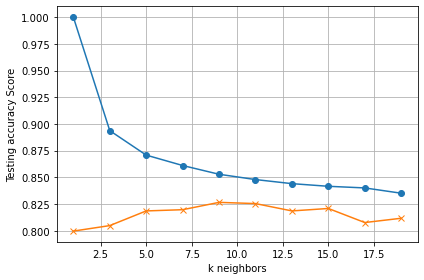

In [15]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.tight_layout()
plt.grid()
plt.show()

In [17]:
# For this dataset k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.827


In [18]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.83


#### Make predictions

In [19]:
results=pd.DataFrame({"Actual": y_test,"Prediction": y_pred}).reset_index(drop=True)
results.head(10)

NameError: name 'y_pred' is not defined

In [ ]:
actuals = results['Actual'].value_counts()
actuals

In [ ]:
actual_confirmed = actuals[1]
actual_candidate = actuals[2]
actual_FPs = actuals[0]
actuals = [actual_confirmed, actual_candidate, actual_FPs]

In [ ]:
## Finding the True Positives
conditions = [
    (results["Prediction"]=="CANDIDATE") & (results['Actual']=="CANDIDATE"),
    (results["Prediction"]=="CONFIRMED") & (results['Actual']=="CONFIRMED"),
    (results["Prediction"]=="FALSE POSITIVE") & (results['Actual']=="FALSE POSITIVE"),
    ]

In [ ]:
values = ['TP_Candidate', 'TP_Confirmed','TP_False']

In [ ]:
results['True_Positives']=np.select(conditions,values)
results.head()

In [ ]:
True_Positives = results['True_Positives'].value_counts()
True_Positives

In [ ]:
TP_confirmed = True_Positives[2]
TP_falsepositive = True_Positives[0]
TP_candidate = True_Positives[3]
TPs = [TP_confirmed, TP_candidate, TP_falsepositive]

In [ ]:
d = {'Label':['Confirmed','Candidate','False Positive'],'Actuals': actuals, 'True_Positives': TPs}
d

In [ ]:
summary_table = pd.DataFrame(d)
summary_table

In [ ]:
summary_table['Recall'] = summary_table['True_Positives']/summary_table['Actuals']
summary_table

# EVALUATION OF MODEL

#### This model has a much better performance (98%) identifying "False Positives" than identifying Confirmed or Candidate Exoplanets.  Althought it is much better than the logistic Regression Model.